In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [234]:
import statsmodels.formula.api as sm
import patsy
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, GridSearchCV


from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, StratifiedShuffleSplit, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import  BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [235]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

In [236]:
job = pd.read_csv('data_job.csv')

# EDA and Features Engineering

In [237]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 9 columns):
Unnamed: 0      3960 non-null int64
Job_Id          3960 non-null object
Job_Title       3960 non-null object
Company         3960 non-null object
Date_Posted     3960 non-null object
Salary          3960 non-null object
Seniority       3960 non-null object
Category        3960 non-null object
Requirements    3960 non-null object
dtypes: int64(1), object(8)
memory usage: 278.5+ KB


In [238]:
job.head()

,Unnamed: 0,Job_Id,Job_Title,Company,Date_Posted,Salary,Seniority,Category,Requirements
0,0,[b' JOB-2019-0090219 '],"[b'Data Engineer (5 days, Orchard, $3500-4000)']",[b'MACHSPEED HUMAN RESOURCES PTE. LTD.'],[b'Posted 27 Apr 2019'],"['/ $3,500to$4,000/ $3,500/ to$4,000/ Monthly/...",[b'Executive'],[b'Information Technology'],['RequirementsRequirements Minimum Degree/Dip...
1,1,[b' JOB-2019-0090314 '],[b'Customer Engagement Excellence Learning Man...,[b'BAYER (SOUTH EAST ASIA) PTE LTD'],[b'Posted 27 Apr 2019'],"['/ $10,400to$15,400/ $10,400/ to$15,400/ Mont...",[b'Manager'],[b'Healthcare / Pharmaceutical'],['Requirements A University / Bachelors degree...
2,2,[b' JOB-2019-0090256 '],"[b'Manager, Research']",[b'GROUP ONE HOLDINGS PTE. LTD.'],[b'Posted 27 Apr 2019'],"['/ $5,000to$8,000/ $5,000/ to$8,000/ Monthly/...",[b'Manager'],[b'Others'],['Requirements·\xa0\xa0\xa0\xa0\xa0\xa0\xa0A s...
3,3,[b' JOB-2019-0090319 '],"[b'Head of Research &amp; Evaluation, Asia']",[b'SAVE THE CHILDREN ASIA REGIONAL OFFICE LIMI...,[b'Posted 27 Apr 2019'],"['/ $80,000to$140,000/ $80,000/ to$140,000/ An...",[b'Middle Management'],[b'General Management'],['RequirementsQualifications 10 plus years ex...
4,4,[b' JOB-2019-0090300 '],[b'IT Systems Adminstrator'],[b'ELIXIR TECHNOLOGY PTE LTD'],[b'Posted 27 Apr 2019'],"['/ $2,800to$3,500/ $2,800/ to$3,500/ Monthly/...",[b'Professional'],[b'Information Technology'],"[""Requirements Bachelor's Degree in Computer S..."


In [239]:
job_clean = job.drop_duplicates(subset='Job_Id', keep='first') #remove duplicate based on Job ID

#drop job Id as it is only use to remove duplicates
job_clean = job_clean.drop(columns=['Job_Id','Unnamed: 0'])
job_clean.shape

(3932, 7)

In [240]:
for col in job_clean.columns:
    job_clean[col]=job_clean[col].str.replace("(\[|\]|b'|Requirements|'|amp;|xa0|\\\|\|xe2x80x93)", "")
job_clean.head()

,Job_Title,Company,Date_Posted,Salary,Seniority,Category,Requirements
0,"Data Engineer (5 days, Orchard, $3500-4000)",MACHSPEED HUMAN RESOURCES PTE. LTD.,Posted 27 Apr 2019,"/ $3,500to$4,000/ $3,500/ to$4,000/ Monthly/ C...",Executive,Information Technology,"Minimum Degree/Diploma in Computer Science, ..."
1,Customer Engagement Excellence Learning Manager,BAYER (SOUTH EAST ASIA) PTE LTD,Posted 27 Apr 2019,"/ $10,400to$15,400/ $10,400/ to$15,400/ Monthl...",Manager,Healthcare / Pharmaceutical,A University / Bachelors degree holder in app...
2,"Manager, Research",GROUP ONE HOLDINGS PTE. LTD.,Posted 27 Apr 2019,"/ $5,000to$8,000/ $5,000/ to$8,000/ Monthly/ C...",Manager,Others,"·A smart communicator, a team player with proa..."
3,"Head of Research & Evaluation, Asia",SAVE THE CHILDREN ASIA REGIONAL OFFICE LIMITED,Posted 27 Apr 2019,"/ $80,000to$140,000/ $80,000/ to$140,000/ Annu...",Middle Management,General Management,Qualifications 10 plus years expertise and do...
4,IT Systems Adminstrator,ELIXIR TECHNOLOGY PTE LTD,Posted 27 Apr 2019,"/ $2,800to$3,500/ $2,800/ to$3,500/ Monthly/ C...",Professional,Information Technology,""" Bachelors Degree in Computer Science, Comput..."


In [241]:
#check for row with missing job title
job_clean[job_clean['Job_Title'] == '']

,Job_Title,Company,Date_Posted,Salary,Seniority,Category,Requirements
27,,,,,,,


In [242]:
empty = job_clean['Job_Title'] == ''

In [243]:
#remove row without job title
job_clean = job_clean[~empty]

In [244]:
#remove row without salary
no_salary = job_clean['Salary'].str.contains('Salary undisclosed')

In [245]:
job_clean_df = job_clean[~no_salary]

In [246]:
#extract salary into min/max/type category
salary_range = job_clean_df["Salary"].str.split("/", n = 5, expand = True) 

In [247]:
salary_range.head()

,0,1,2,3,4,5
0,,"$3,500to$4,000","$3,500","to$4,000",Monthly,Closing on 27 May 2019
1,,"$10,400to$15,400","$10,400","to$15,400",Monthly,Closing on 12 May 2019
2,,"$5,000to$8,000","$5,000","to$8,000",Monthly,Closing on 27 May 2019
3,,"$80,000to$140,000","$80,000","to$140,000",Annually,Closing on 11 May 2019
4,,"$2,800to$3,500","$2,800","to$3,500",Monthly,Closing on 27 May 2019


In [248]:
salary_range = salary_range.rename({0:'recruiter',1:'range', 2:'min', 3:'max', 4:'type'}, axis='columns')

In [249]:
min_max = salary_range['range'].str.split('to', n=2, expand = True)

In [250]:
min_max = min_max.rename({0:'sal_min', 1:'sal_max'}, axis='columns')

In [251]:
salary_range = pd.concat([salary_range, min_max], axis=1)

In [252]:
salary_range.shape

(3472, 8)

In [253]:
#removed $ and 'to' from salary 
for col in salary_range.columns:
    salary_range[col]=salary_range[col].str.replace('(\$|,|to)', '')
salary_range.head()

,recruiter,range,min,max,type,5,sal_min,sal_max
0,,35004000,3500,4000,Monthly,Closing on 27 May 2019,3500,4000
1,,1040015400,10400,15400,Monthly,Closing on 12 May 2019,10400,15400
2,,50008000,5000,8000,Monthly,Closing on 27 May 2019,5000,8000
3,,80000140000,80000,140000,Annually,Closing on 11 May 2019,80000,140000
4,,28003500,2800,3500,Monthly,Closing on 27 May 2019,2800,3500


In [254]:
#data from job posted by recruiter are shifted to the right
#salary min falls under max and salary max falls under type
salary_range[salary_range['recruiter'].str.contains('Recruiter')].head()

,recruiter,range,min,max,type,5,sal_min,sal_max
53,via Recruiter,,25003200,2500,3200,Monthly/ Closing on 26 May 2019,,None
72,Recruiter,,30005000,3000,5000,Monthly/ Closing on 26 May 2019,,None
96,via Recruiter,,18002600,1800,2600,Monthly/ Closing on 26 May 2019,,None
99,via Recruiter,,63006800,6300,6800,Monthly/ Closing on 26 May 2019,,None
103,via Recruiter,,780012200,7800,12200,Monthly/ Closing on 10 May 2019,,None


In [255]:
#adjust salary min and max for recruiter data
salary_range.loc[salary_range['recruiter'].str.contains('Recruiter'), 'sal_min'] = salary_range['max']
salary_range.loc[salary_range['recruiter'].str.contains('Recruiter'), 'sal_max'] = salary_range['type']

In [256]:
#convert from ojbect to float 
salary_range['sal_min'] = salary_range['sal_min'].astype('float64')
salary_range['sal_max'] = salary_range['sal_max'].astype('float64')

In [257]:
salary_range.describe()

,sal_min,sal_max
count,3472.000000,3472.000000
mean,7215.020449,11079.663882
std,15684.739939,23760.781468
min,1.000000,2.000000
25%,2800.000000,4000.000000
50%,4100.000000,6800.000000
75%,6500.000000,10000.000000
max,280000.000000,405000.000000


In [258]:
abovemean = 3*np.mean(salary_range['sal_min'])

In [259]:
salary_range[((salary_range['recruiter'].str.contains('Recruiter')) & (salary_range['sal_min'] > abovemean))]

,recruiter,range,min,max,type,5,sal_min,sal_max
428,Recruiter,,110000180000,110000,180000,Annually/ Closing on 24 May 2019,110000.0,180000.0
1859,Recruiter,,7000080000,70000,80000,Annually/ Closing on 15 May 2019,70000.0,80000.0


In [260]:
#assume sal_min 3x above mean is Annually type of salary the rest are Monthly type
salary_range.loc[((salary_range['recruiter'].str.contains('Recruiter')) & (salary_range['sal_min'] > abovemean)), 'type'] = ' Annually'
salary_range.loc[((salary_range['recruiter'].str.contains('Recruiter')) & (salary_range['sal_min'] < abovemean)), 'type'] = ' Monthly'

In [261]:
#only keep relevent columns before merge back
salary_range = salary_range.drop(columns=['range','min','max',5])

In [262]:
job_df = pd.concat([job_clean_df, salary_range], axis=1)

In [263]:
#drop original salary columns and job date due to feature not useful for prediction
job_df = job_df.drop(columns=['Date_Posted','Salary','recruiter'])

In [264]:
#assuming typo for sal_max 10 times more than sal_min. To correct value by sal_max divided by 10
job_df.loc[(job_df['sal_max']>10*job_df['sal_min']), 'sal_max'] = job_df['sal_max']/10

In [265]:
#standardize all salary type to Monthly
job_df.loc[job_df['type'].str.contains(' Annually'), 'sal_min'] = round(job_df['sal_min']/12)
job_df.loc[job_df['type'].str.contains(' Annually'), 'sal_max'] = round(job_df['sal_max']/12)
job_df = job_df.drop(columns='type')

In [266]:
col = job_df.columns

In [267]:
#further remove job with same data from all columns
job_df = job_df.drop_duplicates(subset=col, keep='first')

In [268]:
#further filter on job title with specific data job keywords
title_key = ['DATA', 'MACHINE','ANALYST','MACHINE LEARNING','ANALYTICS','DEEP LEARNING','RESEARCH','NLP']
key = '|'.join(title_key)
data_job = job_df['Job_Title'].str.upper().str.contains(key)
job_df = job_df[data_job]

In [269]:
#to drop job with max salary less than 2000, assuming data entry/admin/operator job
mask_low = job_df['sal_max']<=2000
job_df = job_df[~mask_low]

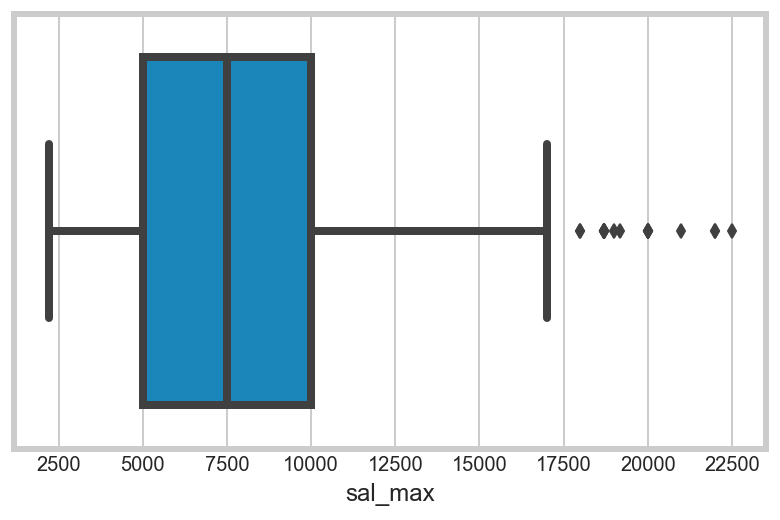

In [270]:
sns.boxplot(job_df['sal_max'])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


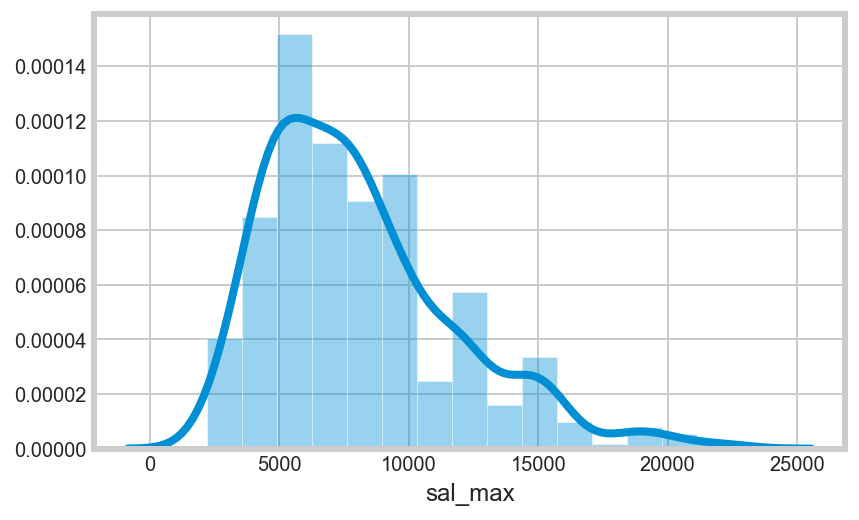

In [271]:
sns.distplot(job_df['sal_max'], bins=15);

In [272]:
#create new feature for average salary
job_df['Avg Salary'] = (job_df['sal_min'] + job_df['sal_max']) / 2

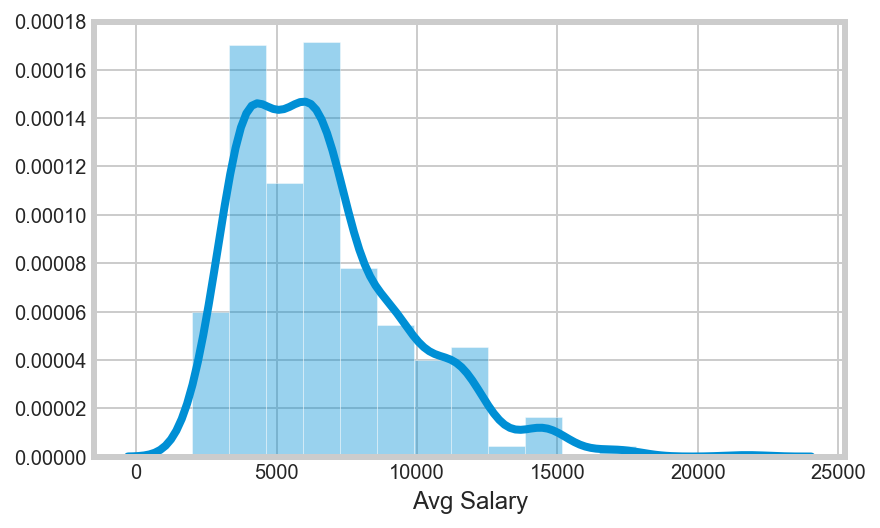

In [273]:
sns.distplot(job_df['Avg Salary'], bins=15);

### create label for high and low salary according to median salary.

In [274]:
job_df["sal_high"] = job_df['Avg Salary'].map(lambda x: 1 if x >= np.median(job_df['Avg Salary']) else 0)
job_df["sal_high"].value_counts()

1    450
0    388
Name: sal_high, dtype: int64

In [275]:
#baseline model at 53% due to salary cut-off at median
baseline = np.mean(job_df["sal_high"])
baseline

0.5369928400954654

In [276]:
job_df = job_df.reset_index(drop=True)

In [277]:
#check seniority with multiple rank
job_df[job_df['Seniority'].str.count(',')>=2]

,Job_Title,Company,Seniority,Category,Requirements,sal_min,sal_max,Avg Salary,sal_high
54,Senior / Reporting Analyst,SIVANTOS PTE. LTD.,"Executive, Junior Executive, Senior Executive",Logistics / Supply Chain,The successful candidate will be an individual...,3500.0,5500.0,4500.0,0
63,Data Migration Lead,Company Undisclosed,"Manager, Professional, Senior Executive",Information Technology,"""The Successful Applicant Must have relevant ...",7000.0,10000.0,8500.0,1
70,Data Engineer,FRIARTUCK PTE LTD,"Professional, Executive, Senior Executive","Consulting , Information Technology","""Responsibilities Build the infrastructure an...",6000.0,8000.0,7000.0,1
84,Analyst,AON HEWITT SINGAPORE PTE. LTD.,"Executive, Junior Executive, Senior Executive",Consulting,"Bachelor’s Degree in Business Administration,...",3000.0,4000.0,3500.0,0
139,Project Analyst,INDEPENDENT PROJECT ANALYSIS PRIVATE LIMITED,"Manager, Professional, Senior Executive","Consulting , Professional Services",*Strong quantitative analytical skill/ Underst...,6000.0,10000.0,8000.0,1
167,Senior Data Analyst,99 PTE. LTD.,"Professional, Executive, Senior Executive",Engineering,What you are/have/will be: 4-6years of workin...,5500.0,7500.0,6500.0,1
220,Data Scientist,PROPERTYGURU PTE. LTD.,"Fresh/entry level, Junior Executive, Senior Ex...",Information Technology,": PhD in Machine Learning related field, or M...",5000.0,7000.0,6000.0,1
230,Big Data Developer,ASIACLOUD SOLUTIONS PRIVATE LIMITED,"Manager, Professional, Senior Executive",Information Technology,Minimum 8 years of experience in Software Eng...,6500.0,8500.0,7500.0,1
275,"Analyst, IBA, General M&A and Transactions Group",Company Undisclosed,"Fresh/entry level, Executive, Junior Executive",Banking and Finance,"""Competencies (Technical / Behavioral): Stron...",6667.0,10417.0,8542.0,1
300,Product Analyst,SEACO ASIA PTE. LTD.,"Executive, Junior Executive, Senior Executive",Logistics / Supply Chain,Bachelor’s Degree in Business or Economics or...,3500.0,4500.0,4000.0,0


In [278]:
job_df['Seniority'] = job_df['Seniority'].str.split(', ')

In [279]:
#job posted with more than 2 seniority classify under multiple,
#second seniority is taken as value for job with 2 seniority 
job_df['Seniority'] = job_df['Seniority'].map(lambda x: x[0] if len(x)>2 else (x[1] if len(x)>1 else x[0]))

In [280]:
job_df['Seniority'].value_counts()

Professional         233
Executive            198
Senior Executive     109
Non-executive         79
Manager               60
Junior Executive      54
Fresh/entry level     41
Middle Management     38
Senior Management     26
Name: Seniority, dtype: int64

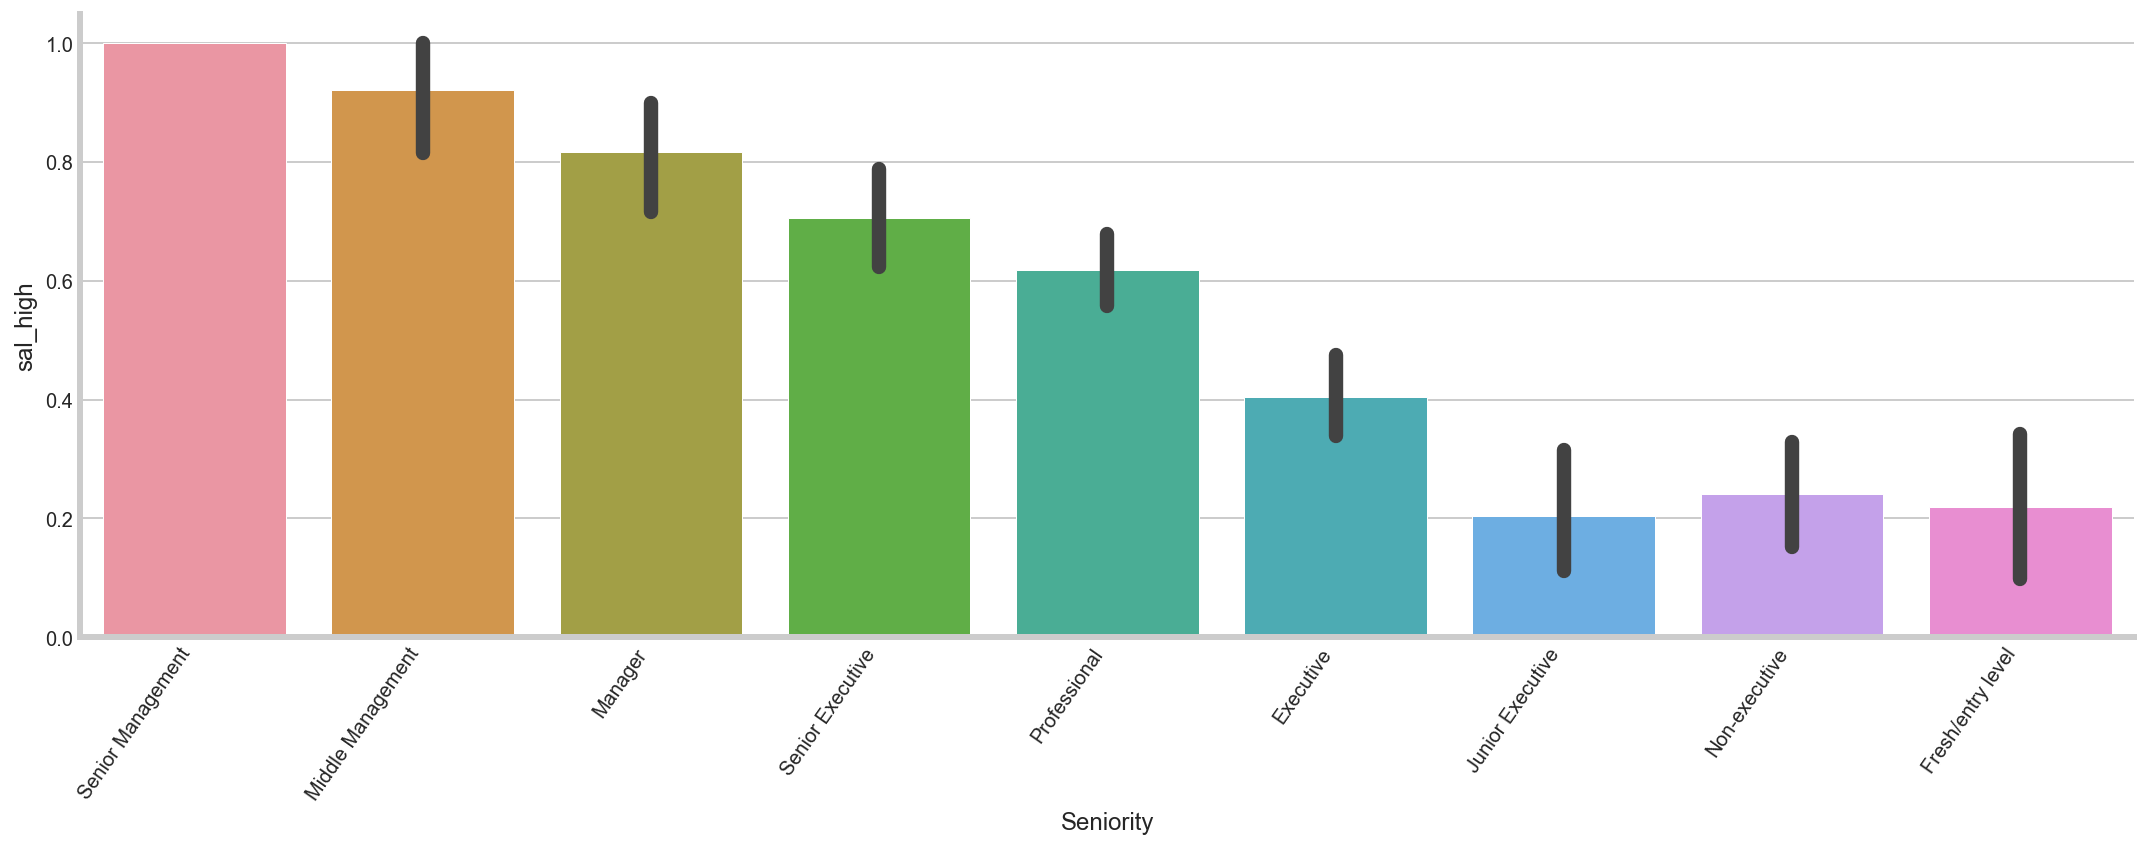

In [281]:
senior_order = ('Senior Management', 'Middle Management', 'Manager','Senior Executive',
                'Professional','Executive', 'Junior Executive','Non-executive','Fresh/entry level')

sns.catplot(x='Seniority', y='sal_high',data=job_df, kind='bar', aspect=3, 
               order=senior_order).set_xticklabels(rotation=55, horizontalalignment='right')
plt.show();

In [282]:
seniority_cat=job_df['Seniority'].str.get_dummies()
seniority_cat.head()

,Executive,Fresh/entry level,Junior Executive,Manager,Middle Management,Non-executive,Professional,Senior Executive,Senior Management
0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0


In [283]:
job_df = pd.concat([job_df, seniority_cat], axis=1)

In [284]:
training_size = int(job_df.shape[0] *0.8)
job_train = job_df.sample(n=training_size, replace=True)
job_train.shape

(670, 18)

In [285]:
mask = job_df.index.isin(job_train.index)
job_test = job_df[~mask]

In [286]:
job_train_senior = pd.DataFrame(job_train, columns=seniority_cat.columns)
job_train_senior.shape

(670, 9)

In [287]:
job_test_senior = pd.DataFrame(job_test, columns=seniority_cat.columns)
job_test_senior.shape

(366, 9)

In [323]:
lr = LogisticRegression(solver='lbfgs')

lr.fit(job_train_senior, job_train["sal_high"])
predicted = lr.predict(job_train_senior)
print('Model score on test data:',lr.score(job_test_senior, job_test["sal_high"]))
print('Cross val score on train data:', np.mean(cross_val_score(lr, job_train_senior, job_train["sal_high"], cv=5)))

Model score on test data: 0.7185792349726776
Cross val score on train data: 0.6791570135953482


In [289]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words
from nltk.corpus import stopwords

In [290]:
stop = stopwords.words('english')
stop += ['regret', 'shortlisted', 'candidates', 'notified','least','skills',
         'related','good','years','added','able','advantage','work','etc',
         'working','ability','excellent','year','knowledge']

In [291]:
cvec = CountVectorizer(lowercase=True, strip_accents='unicode', stop_words=stop)
cvec.fit(job_df['Requirements'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs',...'added', 'able', 'advantage', 'work', 'etc', 'working', 'ability', 'excellent', 'year', 'knowledge'],
        strip_accents='unicode', token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [304]:
model_data = job_df.drop(columns=['Job_Title','Company','Seniority','Category','sal_min','sal_max','Avg Salary'])

In [305]:
nlp = pd.DataFrame(cvec.transform(model_data['Requirements']).todense(),
                       columns=cvec.get_feature_names())

In [310]:
senior_nlp = pd.concat([model_data, nlp], axis=1)
senior_nlp.shape

(838, 6388)

In [320]:
X = senior_nlp.drop(columns=['sal_high','Requirements'])
y = senior_nlp['sal_high'].values

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [324]:
lr = LogisticRegression(solver='lbfgs')

lr.fit(X_train, y_train)
predicted = lr.predict(X_test)
print('Model score on test data:',lr.score(X_test, y_test))
print('Cross val score on train data:', np.mean(cross_val_score(lr, X_train, y_train, cv=5)))

Model score on test data: 0.7440476190476191
Cross val score on train data: 0.7388501103505032


In [ ]:
def get_freq_words(sparse_counts, columns):
    # X_all is a sparse matrix, so sum() returns a 'matrix' datatype ...
    #   which we then convert into a 1-D ndarray for sorting
    word_counts = np.asarray(X_all.sum(axis=0)).reshape(-1)

    # argsort() returns smallest first, so we reverse the result
    largest_count_indices = word_counts.argsort()[::-1]
    freq_words = pd.Series(word_counts[largest_count_indices], 
                           index=columns[largest_count_indices])

    return freq_words

In [ ]:
#most common words for requirements
cvt      =  CountVectorizer(strip_accents='unicode', ngram_range=(1,2), stop_words=stop, min_df=5)
X_all    =  cvt.fit_transform(job_df['Requirements'])
columns  =  np.array(cvt.get_feature_names()) 

freq_words = get_freq_words(X_all, columns)
freq_words_percent = freq_words/len(job_df['Requirements'])
freq_words[:20]

In [ ]:
#most common ngrams for requirements
cvt = CountVectorizer(stop_words=stop, ngram_range=(2,2))
X_all = cvt.fit_transform(job_df['Requirements'])
columns  =  np.array(cvt.get_feature_names())

freq_words = get_freq_words(X_all, columns)
freq_words[:20]

In [ ]:
# MultinomialNB
pipeline = Pipeline([
    ('vect', CountVectorizer(lowercase=True, strip_accents='unicode', stop_words=stop)),
   # ('tfidf', TfidfTransformer()),
    ('cls', MultinomialNB())
    ]) 

pipeline.fit(job_train["Requirements"], job_train["sal_high"])
predicted = pipeline.predict(job_test["Requirements"])
print('Model score:',pipeline.score(job_test["Requirements"], job_test["sal_high"]))
print('Cross val score:', np.mean(cross_val_score(pipeline, job_test["Requirements"], job_test["sal_high"], cv=5)))

In [ ]:
#logistic regression
pipeline = Pipeline([
    ('vect', CountVectorizer(lowercase=True, strip_accents='unicode', stop_words=stop)),
    ('tfidf', TfidfTransformer()),
    ('cls', LogisticRegression(solver='lbfgs'))
]) 

pipeline.fit(job_train["Requirements"], job_train["sal_high"])
predicted = pipeline.predict(job_test["Requirements"])
print('Model score:',pipeline.score(job_test["Requirements"], job_test["sal_high"]))
print('Cross val score:', np.mean(cross_val_score(pipeline, job_test["Requirements"], job_test["sal_high"], cv=5)))